In [1]:
import os
flavor_db = os.path.join(os.getcwd(), "flavor_db")

In [2]:
entities = os.listdir(flavor_db)

In [3]:
import json

with open(os.path.join(flavor_db, entities[0])) as f:
    data_dict = json.load(f)

In [4]:
print(data_dict)

{'category': 'fishseafood-fish', 'category_readable': 'Fish', 'entity_alias': '', 'entity_alias_basket': '', 'entity_alias_readable': 'Anguilliformes', 'entity_alias_synonyms': 'Anguilliformes', 'entity_alias_url': 'https://en.wikipedia.org/wiki/Anguilliformes', 'entity_id': 729, 'molecules': [{'atom_stereo_count': 0, 'bitter': 1, 'bitterdb_id': '520', 'bond_stereo_count': 0, 'cas_id': '67-03-8@70-16-6', 'charge': 0, 'common_name': 'Thiamine Hydrochloride', 'complexity': 269.0, 'covalently_bonded_unit_count': 3, 'defined_atom_stereocenter_count': 0, 'defined_bond_stereocenter_count': 0, 'exact_mass': 336.058, 'fema_flavor_profile': '', 'fema_number': '3322', 'fenoroli_and_os': 1, 'flavor_profile': 'mild@sour@bitter', 'flavornet_id': 0, 'fooddb_flavor_profile': 'sour@bitter@mild', 'fooddb_id': 'FDB008416', 'functional_groups': 'cation@anion@hydroxy compound@alcohol@primary alcohol@amine@primary amine@primary aromatic amine@aromatic compound@heterocyclic compound', 'hba_count': 6, 'hbd_c

In [5]:
categories = set([])

data_dicts = []

for entity in entities:
    with open(os.path.join(flavor_db, entity)) as f:
        data_dict = json.load(f)
        data_dicts.append(data_dict)
        
    categories.add(data_dict["category_readable"])

In [6]:
print(categories)

{'Cabbage', 'Dish', 'Herb', 'Fruit Citrus', 'Berry', 'Legume', 'Cereal', 'Beverage Caffeinated', 'Bakery', 'Fruit-Berry', 'Beverage Alcoholic', 'Vegetable Tuber', 'Plant Derivative', 'Animal Product', 'Gourd', 'Fruit', 'Essential Oil', 'Maize', 'Flower', 'Beverage', 'Fruit Essence', 'Spice', 'Vegetable Root', 'Vegetable Stem', 'Fish', 'Additive', 'Vegetable Fruit', 'Seafood', 'Nut', 'Meat', 'Dairy', 'Vegetable', 'Seed', 'Fungus', 'Plant'}


In [7]:
vegan_categories = ('Spice', 'Plant Derivative', 'Cereal', 'Seed', 'Legume',
                    'Vegetable', 'Fruit', 'Vegetable Root', 'Maize', 'Vegetable Fruit',
                    'Berry', 'Vegetable Stem', 'Nut', 'Fruit-Berry','Vegetable Tuber',
                    'Herb', 'Fungus', 'Essential Oil', 'Fruit Essence', 'Cabbage',
                    'Fruit Citrus', 'Plant', 'Flower')

In [8]:
vegan_entities = []

for entity in data_dicts:
    if entity["category_readable"] in vegan_categories:
        print(entity["entity_alias_readable"])
        vegan_entities.append(entity)

Spinach
Lime Peel Oil
Garcinia Indica
Beans
Mung bean
Filbert
Parsley
Red raspberry
Canola Oil
Citronella
Chestnut
Buckwheat
Creosote
Mixed nuts
Mountain Papaya
Breakfast cereal
Durian
Pineapple
Chive
Moth bean
Cajeput
Yellow zucchini
Quince
Horseradish
Alpine sweetvetch
Hyacinth bean
Truffle
Ceriman
Fig
Mentha Oil
Allspice
Gooseberry
Mexican groundcherry
Peas
Vinegar
Scotch Spearmint
Beech nut
Champaca
Mace
Malabar plum
Corn Oil
Cherry Pepper
Sour Cherry
Elliott's blueberry
Corn grits
Oil-seed Camellia
Black Currant
Peanut Butter
Evening primrose
Jerusalem artichoke
Orris
Oyster mushroom
Kohlrabi
Jostaberry
Arrowhead
Apple
Pak choy
Chia
Arrowroot
Apple Sauce
Epazote
Turnip
Japanese persimmon
Japanese pumpkin
Groundcherry
Achilleas
Millet
Japanese chestnut
Orange Oil
Peanut Oil
Bayberry
Ucuhuba
Red Currant
Butternut
Yardlong bean
Capsicum
Wild Cherry
Corn
Marjoram
Jasmine
Soybean
Anise
Spearmint
Nance
Lingonberry
Dock
Mastic Gum
Feijoa
Quinoa
Mushroom
Chicory
Chinese Quince
Cauliflower

In [21]:
rep_dir = os.path.join(os.getcwd(), "rep_images")
rep_steaks = os.listdir(rep_dir)
print(len(rep_steaks))

39


In [22]:
result_dir = os.path.join(os.getcwd(), "analysis_result", "review-vegan")
results = os.listdir(result_dir)
print(len(results))

160


In [23]:
common_reps = []

for result in results:
    rep_name = os.path.splitext(result)[0]
    if rep_name+".jpg" in rep_steaks:
        common_reps.append(rep_name)

In [34]:
import pandas as pd
import numpy as np

result_df_dict = {}

for rep in common_reps:
    df = pd.read_csv(os.path.join(result_dir, rep+".txt"))
    if np.max(df[" intensity"].values) > 0:
        result_df_dict[rep] = df
    else:
        common_reps.remove(rep)

print(len(common_reps))

29


In [35]:
result_df_dict["Cut"].head()

vegan_entity   intensity
0           Cassia    0.000227
1         Capsicum    0.000227
2             Mint    0.000227
3  Mandarin Orange    0.000227
4        Cherimoya    0.000227

In [36]:
result_df_dict["Cut"].columns

Index(['vegan_entity', ' intensity'], dtype='object')

In [37]:
veg_entities = set([])

for df in result_df_dict.values():
    vegs = veg_entities.update(df[df[" intensity"] > 0]["vegan_entity"].tolist())

print(len(veg_entities))

364


In [38]:
def get_intensity(df, name):
    return df.loc[df["vegan_entity"] == name][" intensity"]

<AxesSubplot:ylabel='Density'>

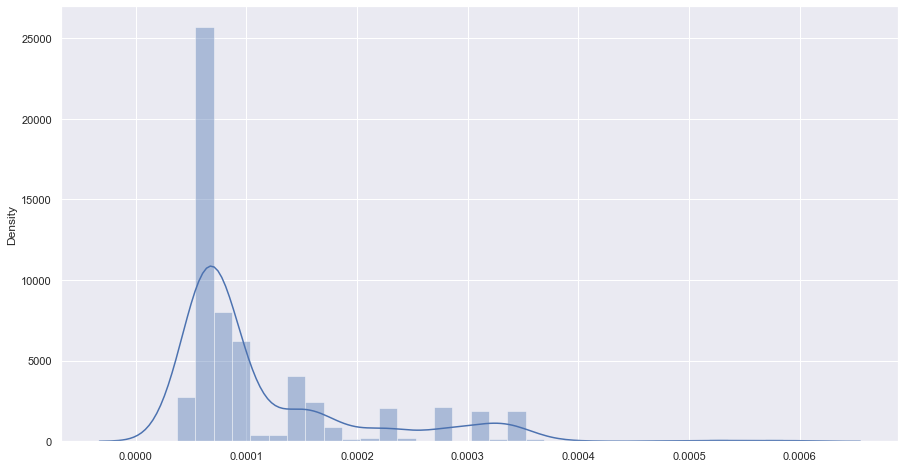

In [39]:
import seaborn as sns

intensities = []
for df in result_df_dict.values():
    intensities.extend(df[df[" intensity"] > 0][" intensity"].tolist())

sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(a=intensities, hist=True, kde=True, rug=False)

In [40]:
from scipy import stats

estimator = stats.gaussian_kde(intensities, bw_method="silverman")

def integrate_kde(estimator, x):
    return estimator.integrate_box_1d(-np.Inf, x)

In [41]:
y1s = {veg:idx/10 for idx, veg in enumerate(veg_entities)}

In [42]:
len(result_df_dict)

29

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

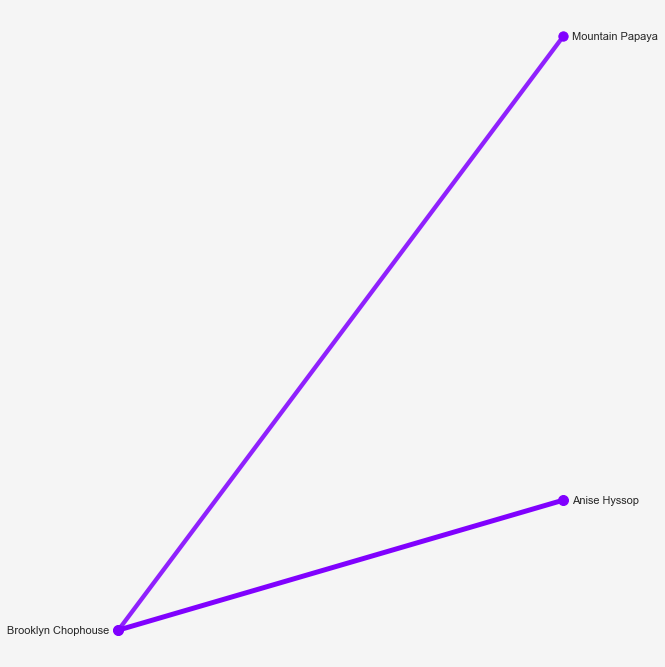

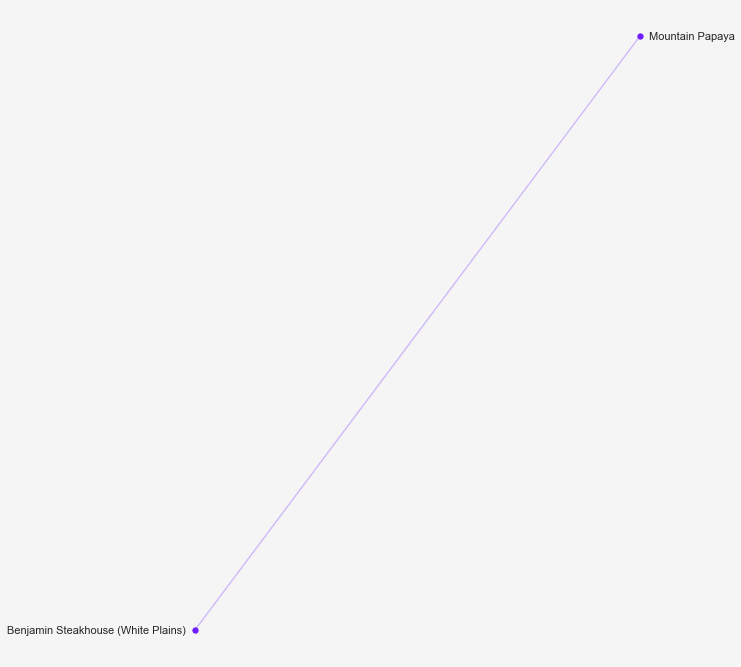

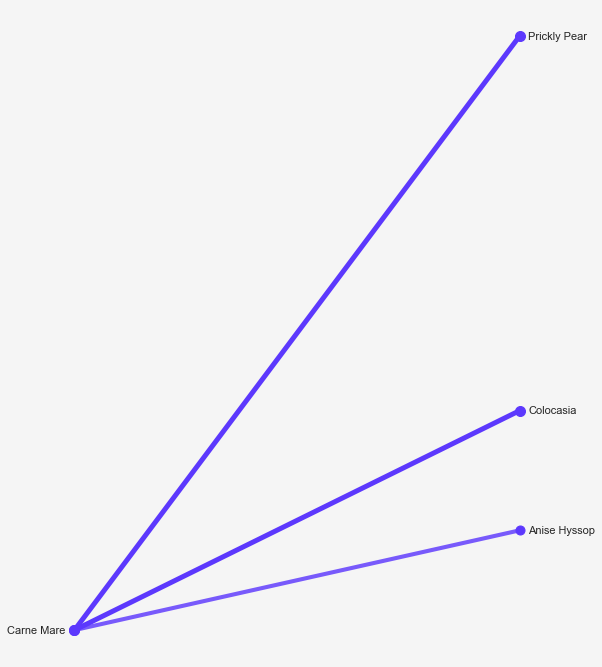

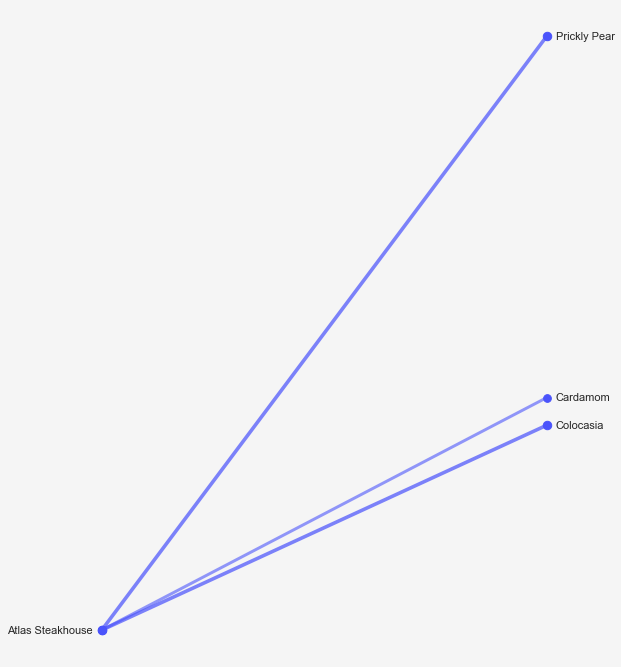

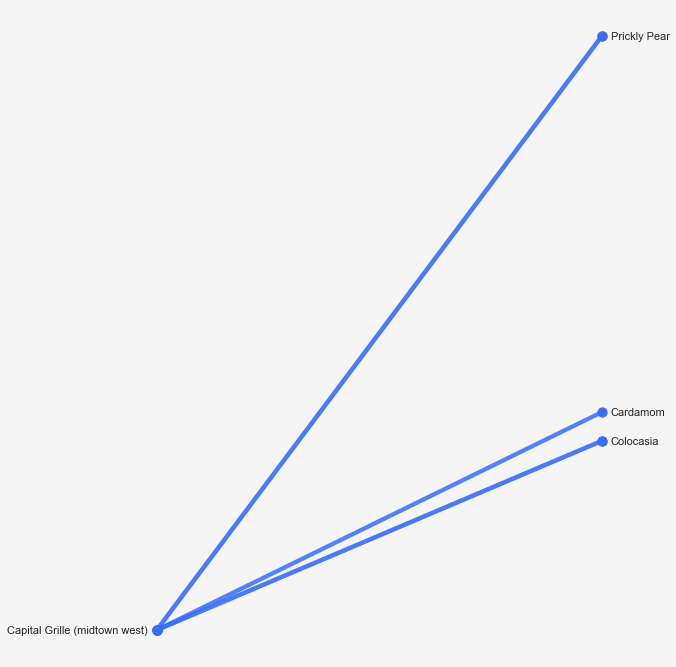

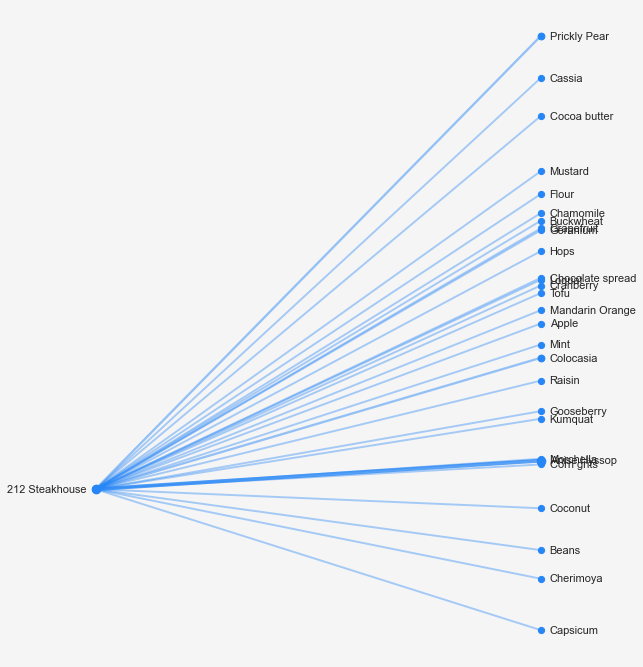

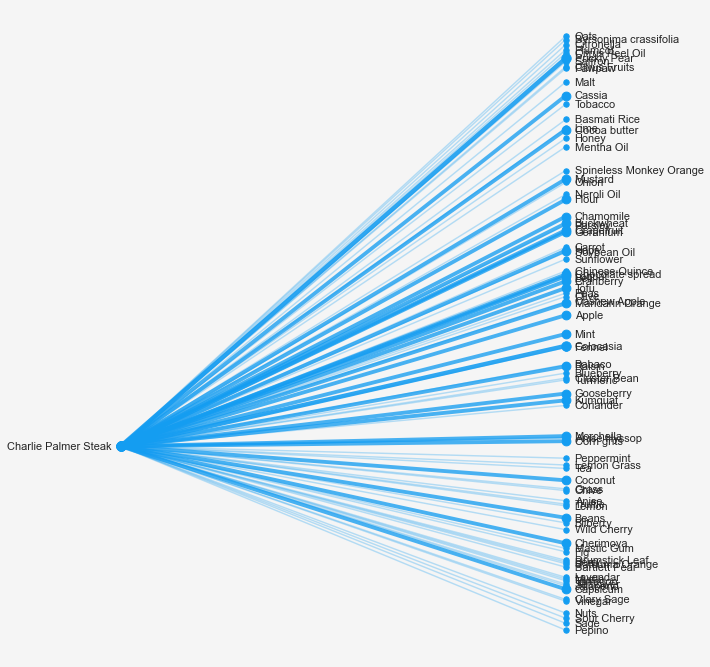

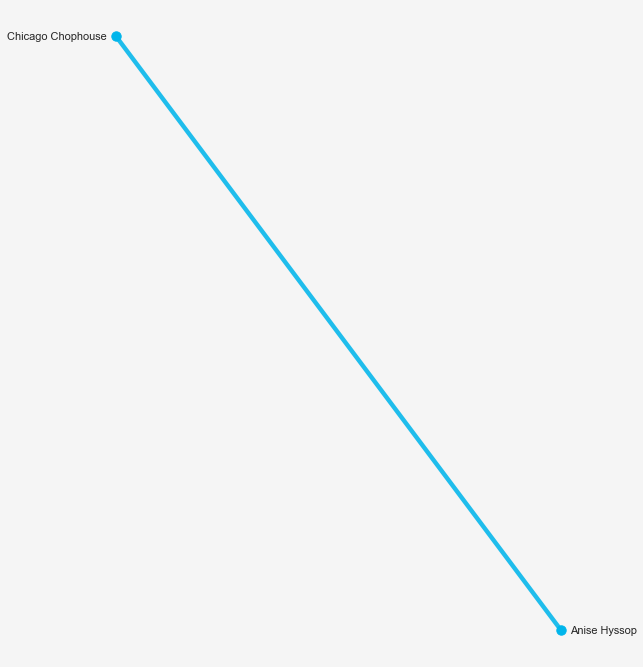

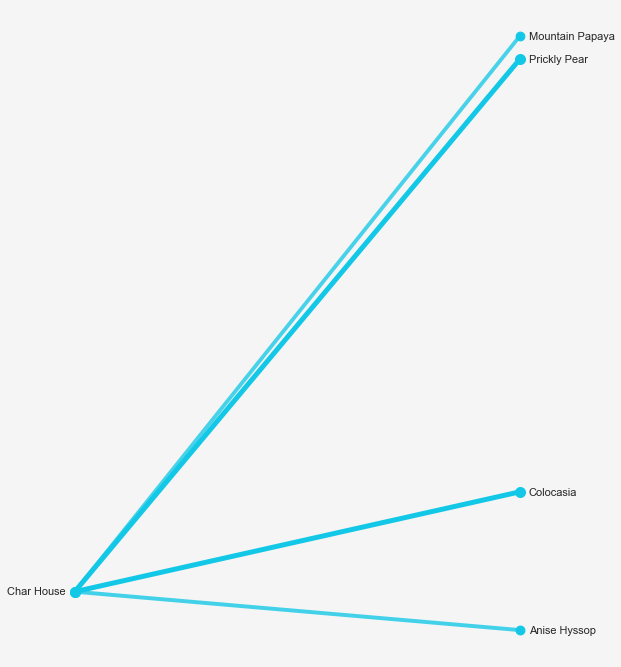

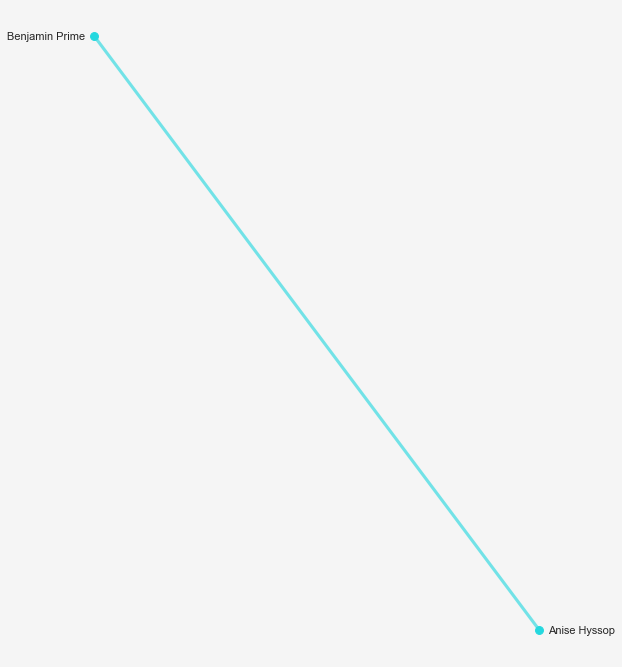

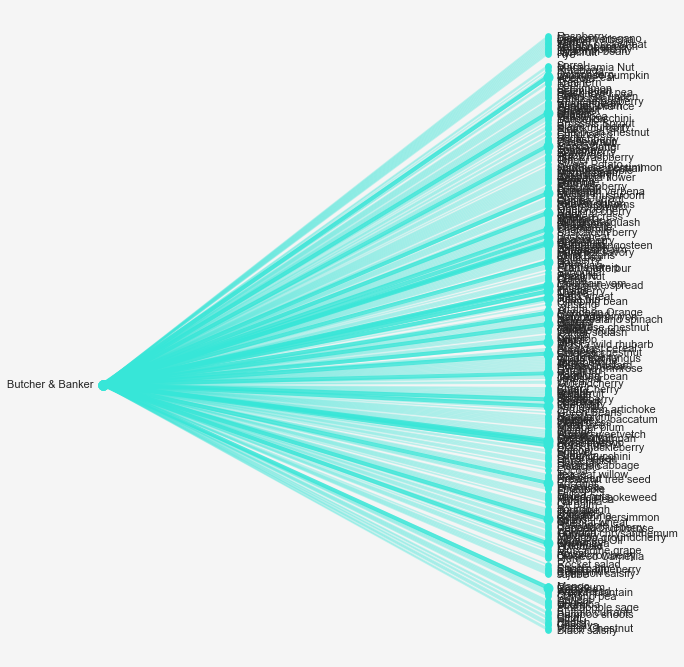

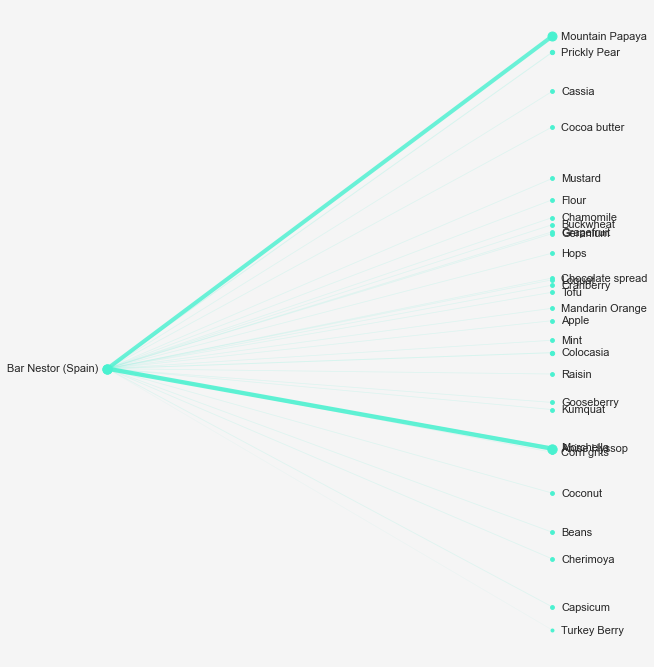

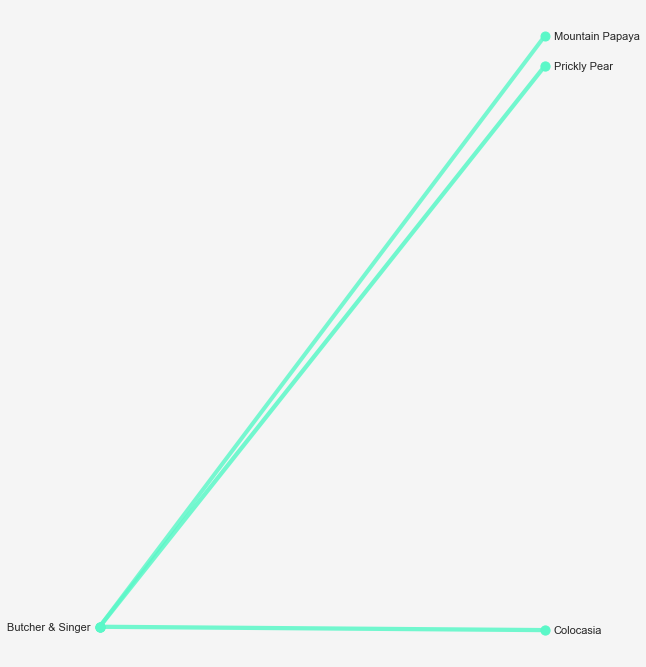

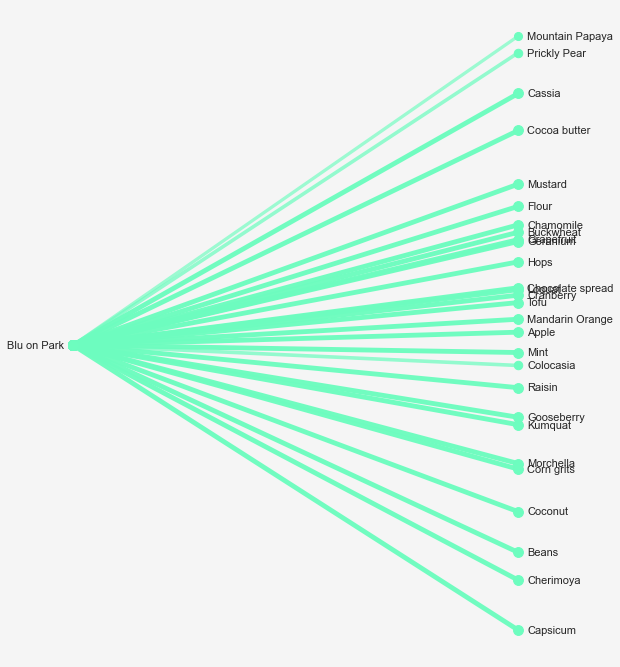

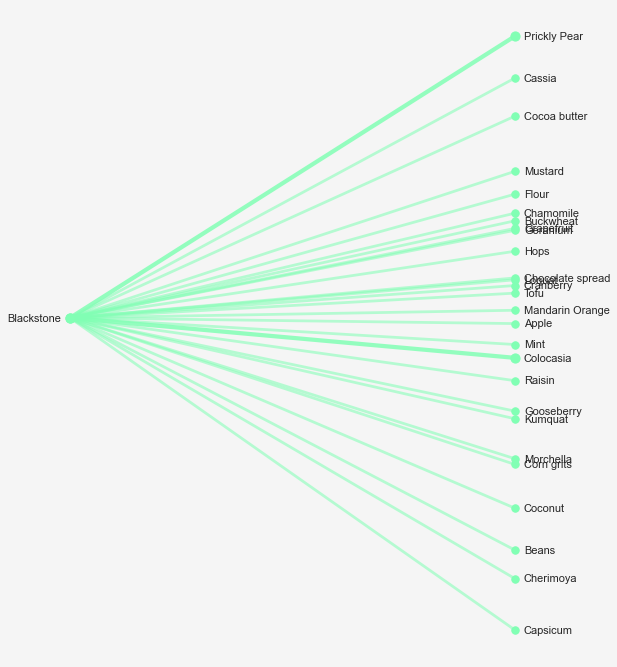

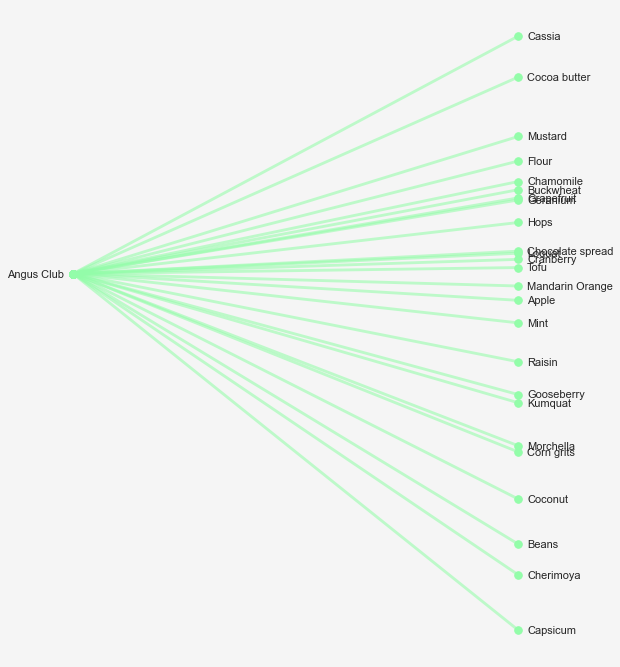

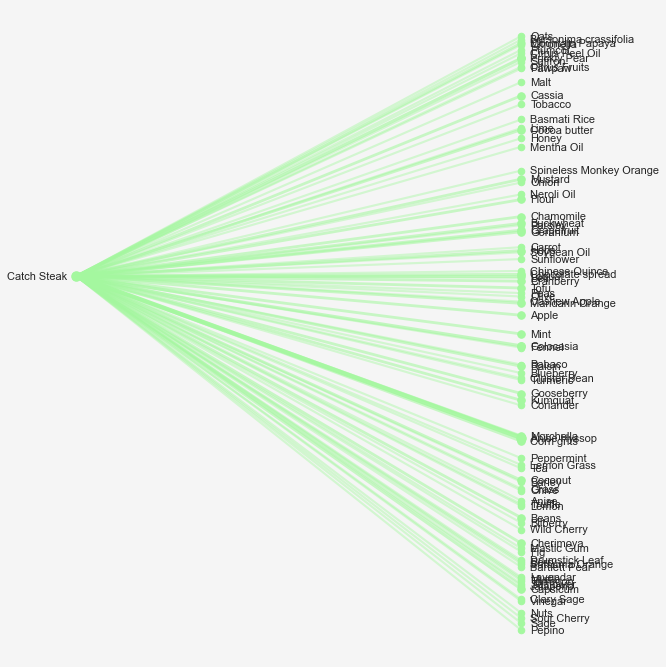

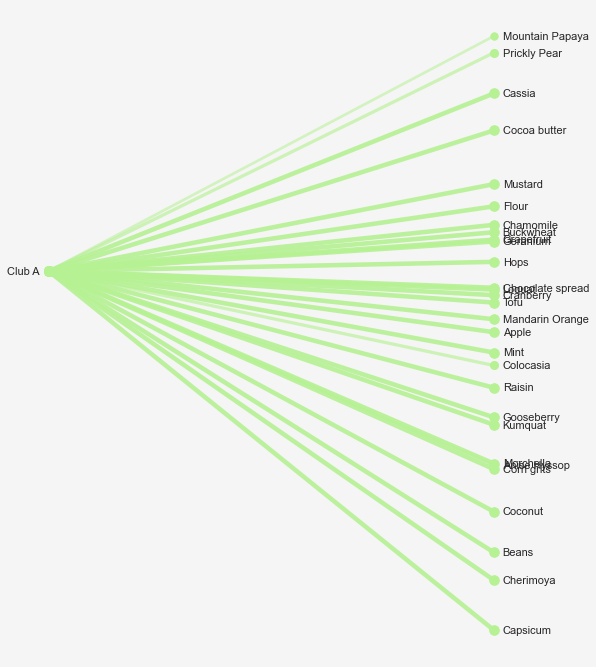

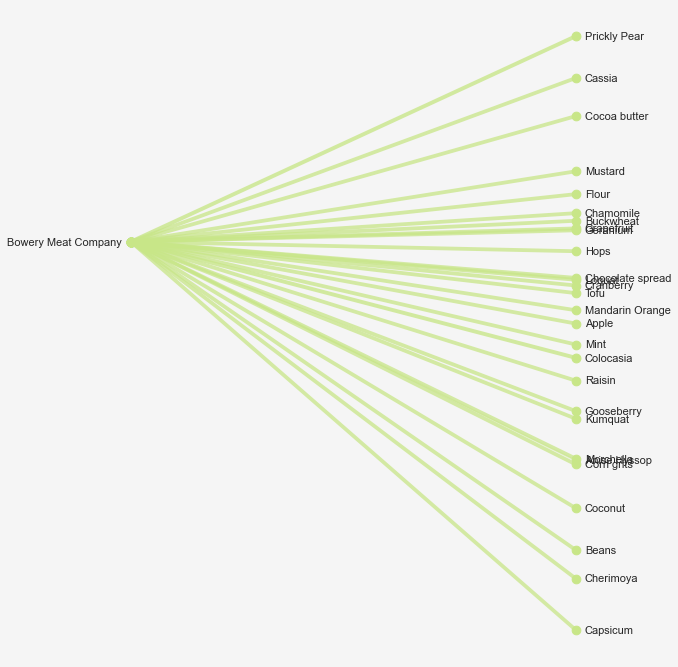

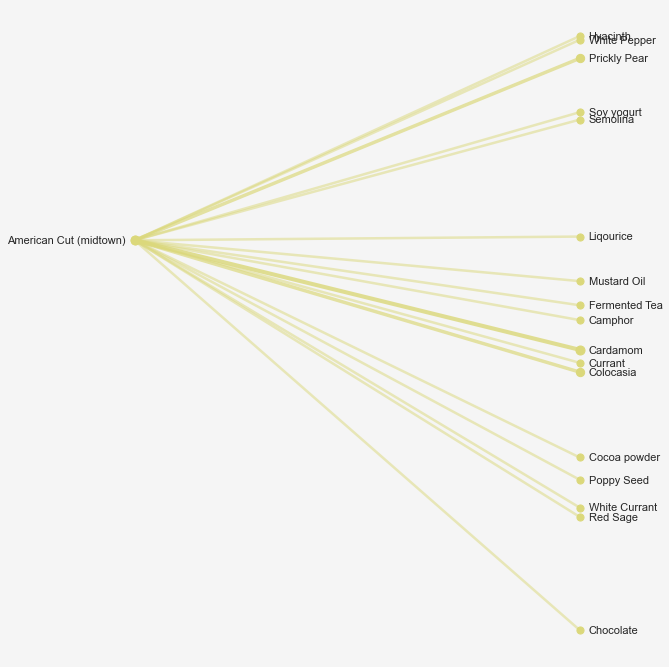

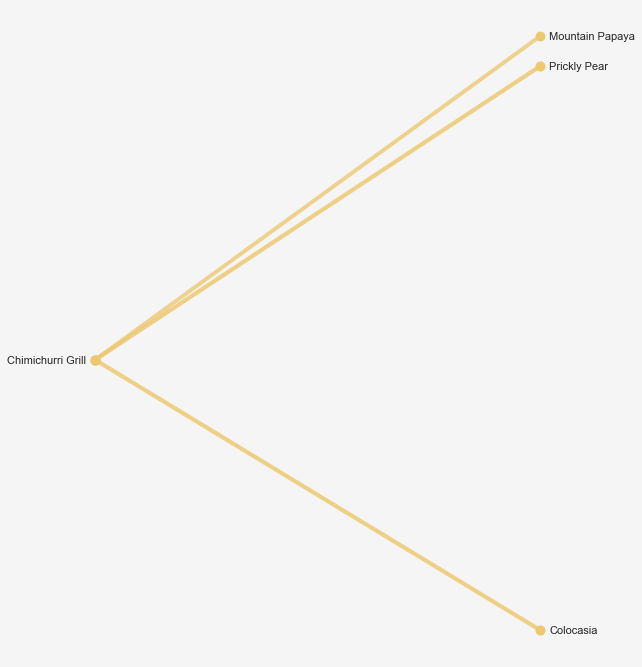

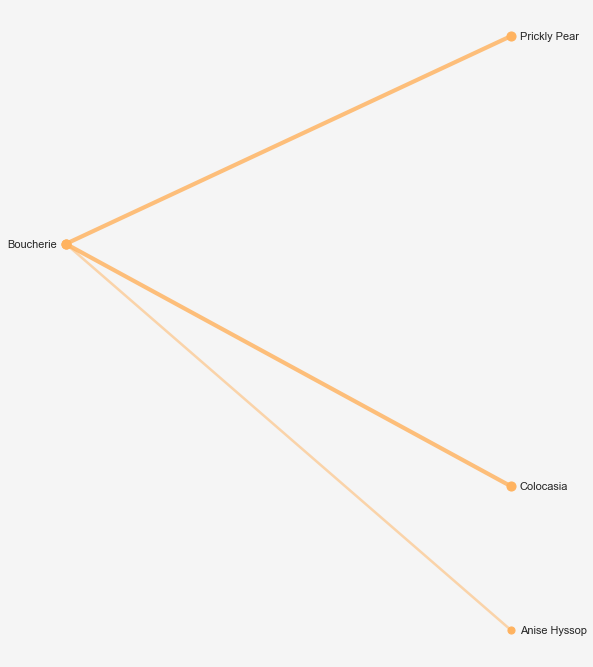

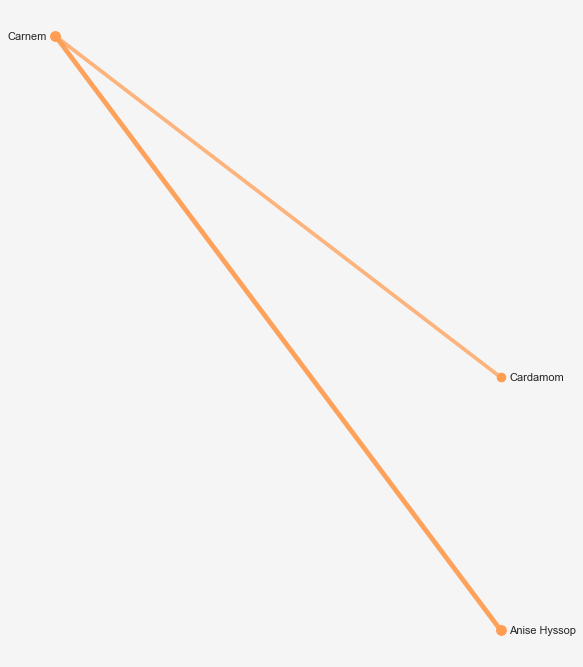

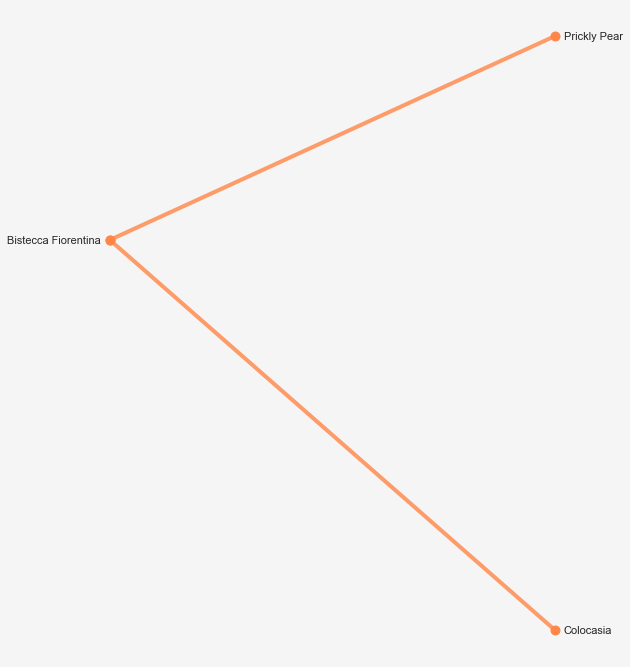

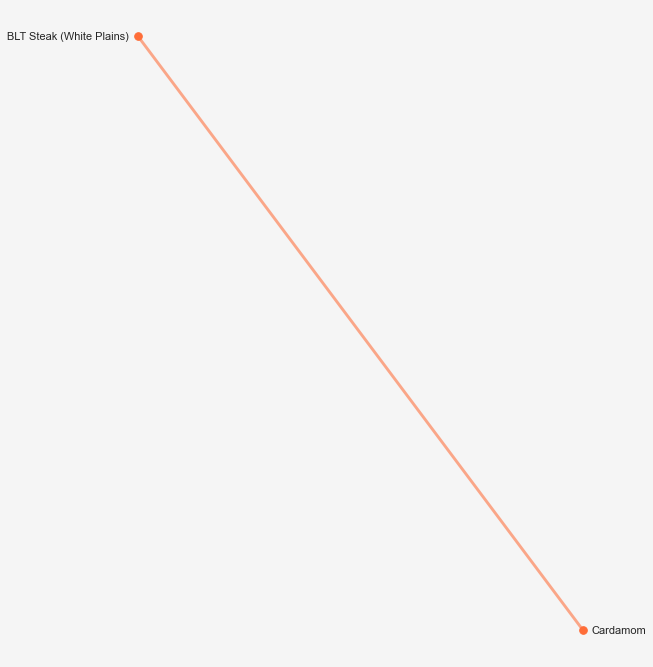

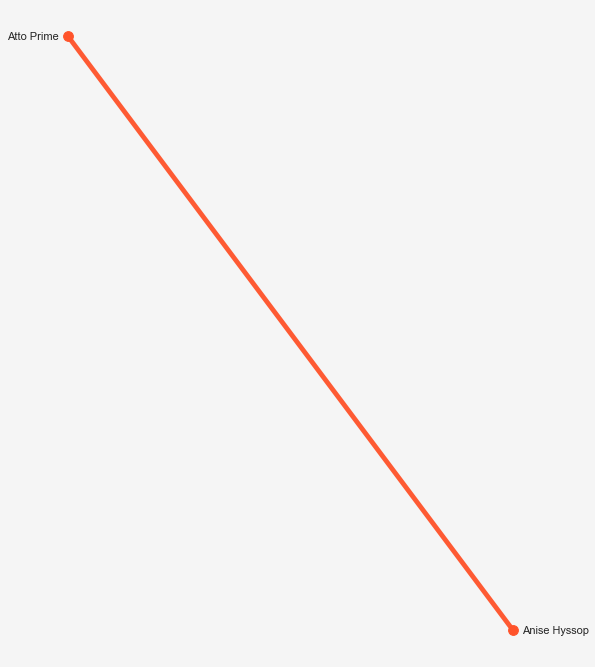

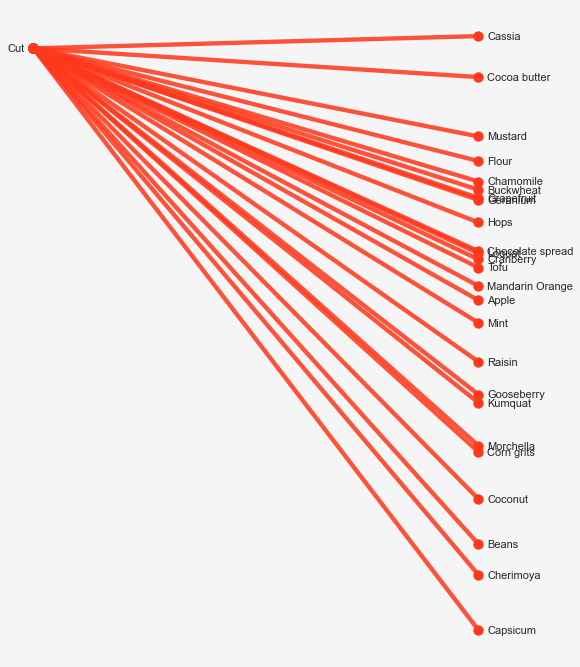

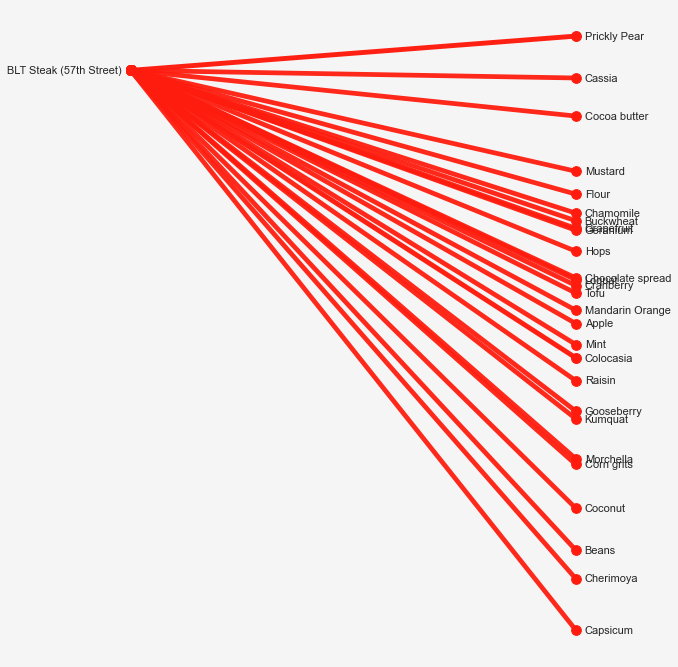

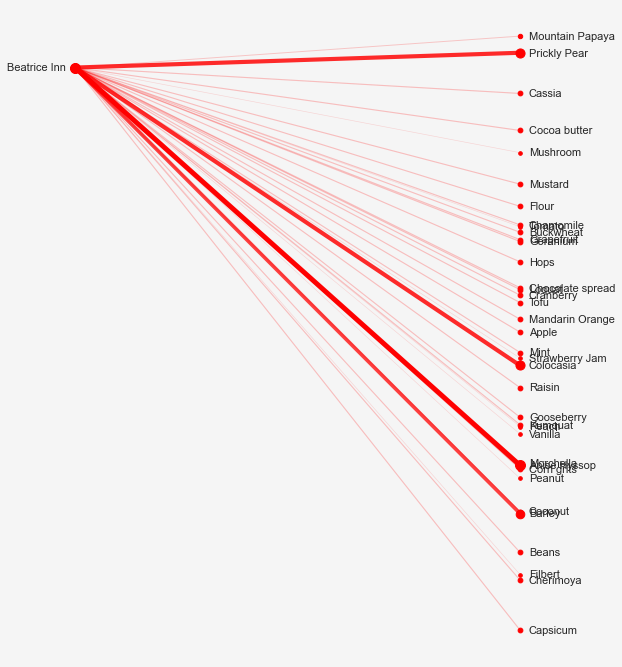

In [69]:
import warnings

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
%matplotlib inline

warnings.filterwarnings(action="ignore")

color = cm.rainbow(np.linspace(0, 1, len(common_reps)))
GREY96 = "0.96"
GREY15 = "0.15"

fig_dir = os.path.join(os.getcwd(), "analysis_result", "figures")
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

for idx, c in enumerate(color):
    fig, ax = plt.subplots(figsize=(8, 11))
    fig.subplots_adjust(left=0.05, right=0.90, top=0.9, bottom=0.075)

    fig.set_facecolor(GREY96)
    ax.set_facecolor(GREY96)

    y0 = idx + 5
    df = list(result_df_dict.values())[idx]
    rest_name = list(result_df_dict.keys())[idx]
    ax.text(1-0.02, y0, rest_name, size=11, color=GREY15, ha="right", va="center")
    
    for j, row in df.iterrows():
        intensity = row[" intensity"]
        if intensity > 0:
            y1 = y1s[row["vegan_entity"]]
            ikde = integrate_kde(estimator=estimator, x = intensity)
            lw = ikde * 5
            s = ikde*100
            ax.plot([1, 2], [y0, y1], c=c, lw=lw, alpha=ikde)
            ax.scatter(1, y0, c = c, s=s, zorder=10)
            ax.scatter(2, y1, c = c, s=s, zorder=10)

            ax.text(2+0.02, y1, row["vegan_entity"], size=11, color=GREY15, va="center")

            ax.set_frame_on(False)

            ax.set_xticks([])
            ax.set_yticks([])
    
    fig.savefig(os.path.join(fig_dir, f"{rest_name}.png"), dpi=300)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

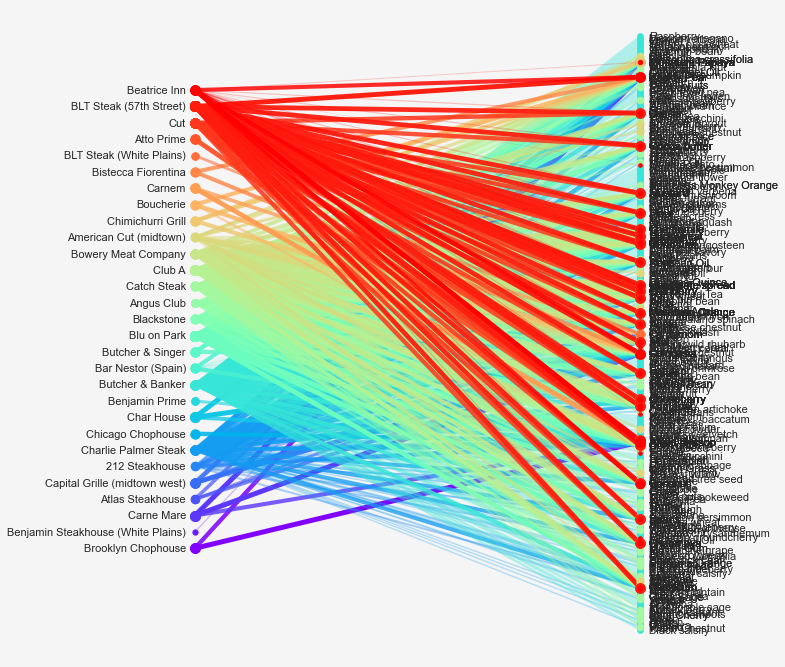

In [70]:
fig, ax = plt.subplots(figsize=(8, 11))
fig.subplots_adjust(left=0.05, right=0.90, top=0.9, bottom=0.075)

fig.set_facecolor(GREY96)
ax.set_facecolor(GREY96)

for idx, c in enumerate(color):
    y0 = idx + 5
    df = list(result_df_dict.values())[idx]
    rest_name = list(result_df_dict.keys())[idx]
    ax.text(1-0.02, y0, rest_name, size=11, color=GREY15, ha="right", va="center")
    
    for j, row in df.iterrows():
        intensity = row[" intensity"]
        if intensity > 0:
            y1 = y1s[row["vegan_entity"]]
            ikde = integrate_kde(estimator=estimator, x = intensity)
            lw = ikde * 5
            s = ikde*100
            ax.plot([1, 2], [y0, y1], c=c, lw=lw, alpha=ikde)
            ax.scatter(1, y0, c = c, s=s, zorder=10)
            ax.scatter(2, y1, c = c, s=s, zorder=10)

            ax.text(2+0.02, y1, row["vegan_entity"], size=11, color=GREY15, va="center")

            ax.set_frame_on(False)

            ax.set_xticks([])
            ax.set_yticks([])
    
fig.savefig(os.path.join(fig_dir, "total.png"), dpi=300)
